<a href="https://colab.research.google.com/github/MarkNgendo/Cryptocurrency-Price-Prediction/blob/main/Cryptocurrency_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Defining the question

### a.) Specifying data analytic question

 Using the trading time series of a cryptocurrency’s price, in addition to a set of qualitative features (news, social impact, Twitter, Reddit, social media sentiment analysis), we would like to build a model that forecasts a cryptocurrency’s price. In this challenge, we are focusing on the trading time series and how we can optimize currency forecasting. We will predict future cryptocurrency prices.



### b.) Defining metric for success

### c.)Understanding the context

After the boom and bust of cryptocurrencies’ prices in recent years, cryptocurrencies have been increasingly regarded as an investment asset. Because of their highly volatile nature, there is a need for good predictions on which to base investment decisions. Different existing studies have leveraged machine learning for more accurate cryptocurrency price prediction. We are interested in applying different modeling techniques to samples with different data structures (qualitative and quantitative data) and dimensional features to achieve an optimization in price prediction.

**NB:** The target value is the actual price. We have data extracted in an interval of 1h for a period of one year (from 1st of March 2020 to 1st of March 2021). We are interested in predicting the values of cryptocurrency prices in specific timestamps that we have in the validation file.

### d.) Recording experimental design

### e.) Data Relevance

## Reading the data

### Importing relevant libraries

In [212]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from yellowbrick.model_selection import validation_curve
from sklearn.ensemble import RandomForestRegressor 
import lightgbm

%matplotlib inline

### Loading datasets

In [213]:
df = pd.read_csv('/content/Train.csv')

In [214]:
test = pd.read_csv('/content/Test.csv')

## Checking the data

### Previewing the top of our dataset

In [215]:
df.head()

id  asset_id  ...  market_cap_global         close
0  ID_322qz6         1  ...       2.818066e+11   9428.279323
1  ID_3239o9         1  ...       2.126897e+11   7967.567267
2  ID_323J9k         1  ...       1.530712e+12  49120.738484
3  ID_323y5P         1  ...                NaN           NaN
4  ID_324kJH         1  ...       3.386925e+11  10384.798216

[5 rows x 49 columns]

In [216]:
test.head()

id  asset_id  ...  percent_change_24h  market_cap_global
0  ID_323Sn2         1  ...                 NaN                NaN
1  ID_325SNW         1  ...           -0.555698       3.631052e+11
2  ID_325uzE         1  ...            1.689370       1.771075e+11
3  ID_328qCx         1  ...                 NaN                NaN
4  ID_3293uJ         1  ...                 NaN                NaN

[5 rows x 48 columns]

### previewing the bottom of our dataset

In [217]:
df.tail()

id  asset_id  ...  market_cap_global         close
12627  ID_zybd4H         1  ...                NaN           NaN
12628  ID_zydeys         1  ...       1.978198e+11   7303.640282
12629  ID_zyfj4W         1  ...       2.493421e+11   8828.440234
12630  ID_zz5eGB         1  ...       2.757547e+11   9658.204385
12631  ID_zzwUuL         1  ...       3.836728e+11  11795.042557

[5 rows x 49 columns]

In [218]:
test.tail()

id  asset_id  ...  percent_change_24h  market_cap_global
6217  ID_zufSPk         1  ...           -0.967973       2.262125e+11
6218  ID_zuz9yf         1  ...                 NaN       3.523272e+11
6219  ID_zvrMSX         1  ...                 NaN                NaN
6220  ID_zy9Cfv         1  ...                 NaN                NaN
6221  ID_zyAFd7         1  ...           -3.289226       1.926557e+11

[5 rows x 48 columns]

### Dataset information

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12632 entries, 0 to 12631
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       12632 non-null  object 
 1   asset_id                 12632 non-null  int64  
 2   open                     8617 non-null   float64
 3   high                     8617 non-null   float64
 4   low                      8617 non-null   float64
 5   volume                   8605 non-null   float64
 6   market_cap               8379 non-null   float64
 7   url_shares               8575 non-null   float64
 8   unique_url_shares        8575 non-null   float64
 9   reddit_posts             12391 non-null  float64
 10  reddit_posts_score       12391 non-null  float64
 11  reddit_comments          12402 non-null  float64
 12  reddit_comments_score    12402 non-null  float64
 13  tweets                   8584 non-null   float64
 14  tweet_spam            

In [220]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6222 entries, 0 to 6221
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       6222 non-null   object 
 1   asset_id                 6222 non-null   int64  
 2   open                     4304 non-null   float64
 3   high                     4304 non-null   float64
 4   low                      4304 non-null   float64
 5   volume                   4302 non-null   float64
 6   market_cap               4191 non-null   float64
 7   url_shares               4285 non-null   float64
 8   unique_url_shares        4285 non-null   float64
 9   reddit_posts             6122 non-null   float64
 10  reddit_posts_score       6122 non-null   float64
 11  reddit_comments          6109 non-null   float64
 12  reddit_comments_score    6109 non-null   float64
 13  tweets                   4289 non-null   float64
 14  tweet_spam              

## External Data Source Validation

## Tidying the dataset

### Consistency

In [221]:
df.duplicated().sum()

0

In [222]:
test.duplicated().sum()

0

### Completeness

In [223]:
df.isnull().sum()

id                            0
asset_id                      0
open                       4015
high                       4015
low                        4015
volume                     4027
market_cap                 4253
url_shares                 4057
unique_url_shares          4057
reddit_posts                241
reddit_posts_score          241
reddit_comments             230
reddit_comments_score       230
tweets                     4048
tweet_spam                 4048
tweet_followers            4058
tweet_quotes               4058
tweet_retweets             4058
tweet_replies              4058
tweet_favorites            4058
tweet_sentiment1           4048
tweet_sentiment2           4048
tweet_sentiment3           4048
tweet_sentiment4           4048
tweet_sentiment5           4048
tweet_sentiment_impact1    4048
tweet_sentiment_impact2    4048
tweet_sentiment_impact3    4048
tweet_sentiment_impact4    4048
tweet_sentiment_impact5    4048
social_score               4048
average_

In [224]:
test.isnull().sum()

id                            0
asset_id                      0
open                       1918
high                       1918
low                        1918
volume                     1920
market_cap                 2031
url_shares                 1937
unique_url_shares          1937
reddit_posts                100
reddit_posts_score          100
reddit_comments             113
reddit_comments_score       113
tweets                     1933
tweet_spam                 1933
tweet_followers            1935
tweet_quotes               1935
tweet_retweets             1935
tweet_replies              1935
tweet_favorites            1935
tweet_sentiment1           1933
tweet_sentiment2           1933
tweet_sentiment3           1933
tweet_sentiment4           1933
tweet_sentiment5           1933
tweet_sentiment_impact1    1933
tweet_sentiment_impact2    1933
tweet_sentiment_impact3    1933
tweet_sentiment_impact4    1933
tweet_sentiment_impact5    1933
social_score               1933
average_

It is important to note that we have columns that have more importance than others and some of these include open and market cap. Therefore, we will first drop any rows where these  entries are missing. There is need to reexamine the dataset after that.

In [225]:
df.dropna(axis=0,
          subset = ['open', 'market_cap', 'market_cap_global', 'volatility', 'percent_change_24h', 'volume'],
          inplace = True)

In [226]:
# checking for remaining null values

df.isnull().sum()

id                            0
asset_id                      0
open                          0
high                          0
low                           0
volume                        0
market_cap                    0
url_shares                    7
unique_url_shares             7
reddit_posts                 21
reddit_posts_score           21
reddit_comments              20
reddit_comments_score        20
tweets                        0
tweet_spam                    0
tweet_followers               0
tweet_quotes                  0
tweet_retweets                0
tweet_replies                 0
tweet_favorites               0
tweet_sentiment1              0
tweet_sentiment2              0
tweet_sentiment3              0
tweet_sentiment4              0
tweet_sentiment5              0
tweet_sentiment_impact1       0
tweet_sentiment_impact2       0
tweet_sentiment_impact3       0
tweet_sentiment_impact4       0
tweet_sentiment_impact5       0
social_score                  0
average_

In [227]:
# for the test data, we have to subject it to the same procedures

test.dropna(axis=0,
          subset = ['open', 'market_cap', 'market_cap_global', 'volatility', 'percent_change_24h', 'volume'],
          inplace = True)

# checking remaining null values

test.isnull().sum()

id                            0
asset_id                      0
open                          0
high                          0
low                           0
volume                        0
market_cap                    0
url_shares                    3
unique_url_shares             3
reddit_posts                  5
reddit_posts_score            5
reddit_comments               4
reddit_comments_score         4
tweets                        0
tweet_spam                    0
tweet_followers               0
tweet_quotes                  0
tweet_retweets                0
tweet_replies                 0
tweet_favorites               0
tweet_sentiment1              0
tweet_sentiment2              0
tweet_sentiment3              0
tweet_sentiment4              0
tweet_sentiment5              0
tweet_sentiment_impact1       0
tweet_sentiment_impact2       0
tweet_sentiment_impact3       0
tweet_sentiment_impact4       0
tweet_sentiment_impact5       0
social_score                  0
average_

The remaining null values have no bearing if they are imputed with zeros. For example, reddit posts null values indicate no posts were shared on Reddit during that time.

Before that, there are several columns that have been either compiled into a single one(the social media columns) or have barely any usefulness upon performing extensive data walkthrough.

### Accuracy

In [228]:
# list of relevant columns to keep

useful = ['id', 'open', 'high', 'low', 'volume', 'market_cap', 'social_score',
          'average_sentiment', 'price_score', 'social_impact_score',
          'correlation_rank', 'volatility', 'market_cap_global',
          'percent_change_24h', 'close']

# appending relevant columns to an empty list
drop = []
for x in list(df.columns):
  if x not in useful:
    drop.append(x)

df.drop(labels= drop,
        axis = 1,
        inplace = True)

df.head()

id          open  ...  market_cap_global         close
0  ID_322qz6   9422.849081  ...       2.818066e+11   9428.279323
1  ID_3239o9   7985.359278  ...       2.126897e+11   7967.567267
2  ID_323J9k  49202.033778  ...       1.530712e+12  49120.738484
4  ID_324kJH  10535.737119  ...       3.386925e+11  10384.798216
6  ID_325m2L   9697.250948  ...       2.807819e+11   9712.247413

[5 rows x 15 columns]

In [229]:
# checking for null values in remaining columns

df.isnull().sum()

id                     0
open                   0
high                   0
low                    0
volume                 0
market_cap             0
social_score           0
average_sentiment      0
price_score            0
social_impact_score    0
correlation_rank       0
volatility             0
percent_change_24h     0
market_cap_global      0
close                  0
dtype: int64

In [230]:
drop = []
for x in list(test.columns):
  if x not in useful:
    drop.append(x)


# dropping irrelevant columns in test set

test.drop(labels = drop,
          axis = 1,
          inplace = True)

test.head()

id          open  ...  percent_change_24h  market_cap_global
1  ID_325SNW  11335.062188  ...           -0.555698       3.631052e+11
2  ID_325uzE   6322.560756  ...            1.689370       1.771075e+11
5  ID_329H37  12309.911239  ...            3.920331       3.916727e+11
6  ID_32DnK8   9301.916435  ...           -0.510029       2.665700e+11
8  ID_32H6TE   9269.535206  ...            2.604443       2.523184e+11

[5 rows x 14 columns]

In [231]:
test.isnull().sum()

id                     0
open                   0
high                   0
low                    0
volume                 0
market_cap             0
social_score           0
average_sentiment      0
price_score            0
social_impact_score    0
correlation_rank       0
volatility             0
percent_change_24h     0
market_cap_global      0
dtype: int64

In [232]:
# checking the shapes of the dataset after this procedure

df.shape, test.shape

((8039, 15), (4029, 14))

### Validity

### Outlier Handling


Checking for outliers using boxplots

In [233]:
# Creating a function that plots boxplots using a for loop

def plot_boxplots(target_dataframe,col_names):
    fig, ax = plt.subplots(len(col_names), figsize=(10,80))
    for i, column_name in enumerate(col_names):
        sns.boxplot(y=target_dataframe[column_name], ax=ax[i])
        ax[i].set_title('Box plot - {}'.format(column_name), fontsize=10)
        ax[i].set_xlabel(column_name, fontsize=8)

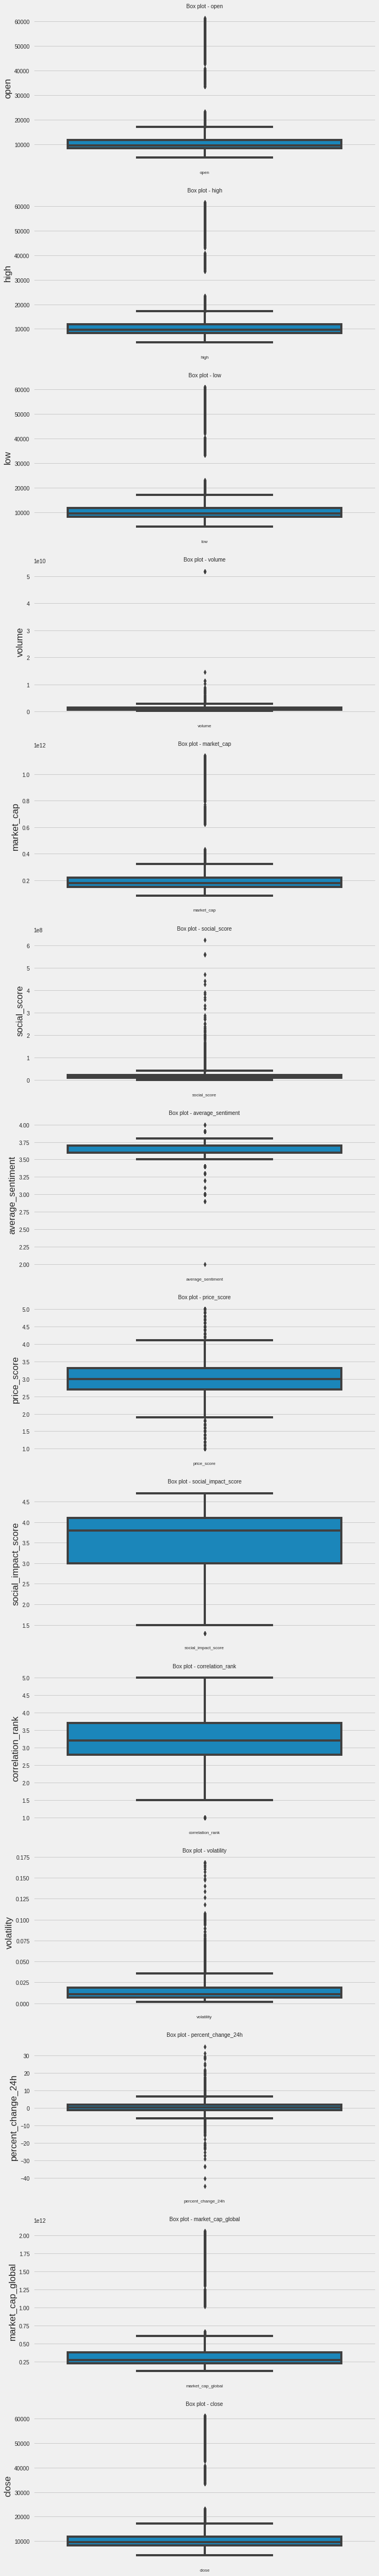

In [234]:
# Checking for outliers in our variables

col_names = [i for i in df.describe().columns]

plt.style.use('fivethirtyeight')
plot_boxplots(df,col_names)
plt.show()

> Locating the outliers to find out what they are and what effect they have on our data

In [235]:
# Index based search of outliers
indexes = []
percents = {}
percent_outliers = []
def percent_search(df):

  # for loop to create column interquantile ranges
  for x in df.describe().columns:
    q1 = df.describe().at['25%', x]
    q3 = df.describe().at['75%', x]
    iqr = q3 - q1

    # Upper and lower detection limits
    upper = q3 + iqr * 1.5
    lower = q1 - iqr * 1.5
    
    # catching percentage outliers in each column
    number = []
    
    # looping through entries in a column
    for pos, val in enumerate(df[x]):

      if val < lower or val > upper:
        number.append(pos)
        

        if pos not in indexes:
          indexes.append(pos)

    percent_outliers.append(len(number) / len(df[x]) * 100)

  percents = {column : percent for (column, percent) in zip(list(df.describe().columns), percent_outliers)}

  return  percents

In [236]:
# finding how outlier presence in columns

percent_search(df)

{'average_sentiment': 1.4802836173653438,
 'close': 18.696355268068167,
 'correlation_rank': 1.1568603060082099,
 'high': 18.770991416842893,
 'low': 18.646597835551685,
 'market_cap': 18.5346436123896,
 'market_cap_global': 13.272795123771614,
 'open': 18.721233984326407,
 'percent_change_24h': 7.16507028237343,
 'price_score': 14.753078741136957,
 'social_impact_score': 0.049757432516482146,
 'social_score': 11.270058464983206,
 'volatility': 5.448438860554796,
 'volume': 4.776713521582286}

**Explanation**

The outliers accurately reflect how the real cryptocurrency prices vary in the market. On top of this, dropping them would cut our dataset in half. Therefore, the decision that was arrived at was one of keeping them as they are to avoid altering the data

## Exploratory Data Analysis

### Univariate Data Analysis

#### a) Measures of Central Tendency 

In [237]:
#finding the mean, median and mode
for i in df.describe().columns:
  print(f'for column {i}')
  print('mean:', df[i].mean())
  print('median:', df[i].median())
  print('mode:', df[i].mode())
  print('*********************************************** \n')
  

for column open
mean: 15288.152232215922
median: 9579.472658
mode: 0    8962.00541
dtype: float64
*********************************************** 

for column high
mean: 15342.046086504553
median: 9594.687673
mode: 0    8962.00541
dtype: float64
*********************************************** 

for column low
mean: 15233.433473295701
median: 9556.010183
mode: 0    8947.227578
dtype: float64
*********************************************** 

for column volume
mean: 1276821288.3443215
median: 967679345.0
mode: 0    5.185678e+10
dtype: float64
*********************************************** 

for column market_cap
mean: 282352139419.5675
median: 175395212779.0
mode: 0    8.875422e+11
1    8.935197e+11
2    9.026881e+11
3    9.093261e+11
4    9.099567e+11
5    9.111170e+11
6    9.133164e+11
7    9.155700e+11
8    9.207742e+11
9    9.214360e+11
dtype: float64
*********************************************** 

for column social_score
mean: 22209912.64883692
median: 13877658.0
mode: 0      1243

#### b) Measures of Dispersion

In [238]:
#Finding the measures of dispersion
for i in df.describe().columns:
  print(f'for column {i}')
  print('std: ', df[i].std())
  print('var: ', df[i].var())
  print('skewness: ', df[i].skew())
  print('kurtosis: ', df[i].kurt())
  print('************************************* \n')


for column open
std:  14228.956256007787
var:  202463196.13538313
skewness:  2.166014580389779
kurtosis:  3.157917977891319
************************************* 

for column high
std:  14316.407368021068
var:  204959519.9271279
skewness:  2.1650821172067123
kurtosis:  3.1465999217158065
************************************* 

for column low
std:  14143.407087897263
var:  200035964.05398253
skewness:  2.1662916012029836
kurtosis:  3.165197949563233
************************************* 

for column volume
std:  1459909186.8871272
var:  2.131334833957433e+18
skewness:  21.346636977485424
kurtosis:  717.484052834753
************************************* 

for column market_cap
std:  266407831097.01974
var:  7.09731324698182e+22
skewness:  2.1625511634056536
kurtosis:  3.143292917457272
************************************* 

for column social_score
std:  29741187.088885613
var:  884538209456096.4
skewness:  6.90299940843771
kurtosis:  84.21998508440984
***********************************

#### Plotting histograms

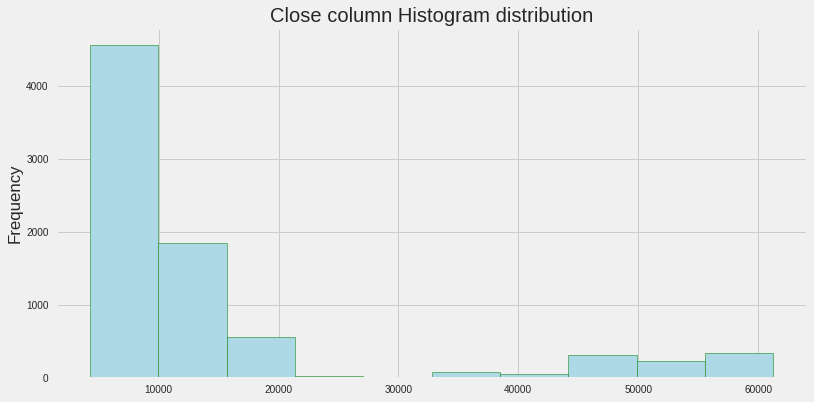

In [239]:
# Histogram of close column 
df.close.plot(kind='hist', facecolor='lightblue', edgecolor='green',
              figsize=(12,6))
plt.title("Close column Histogram distribution")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


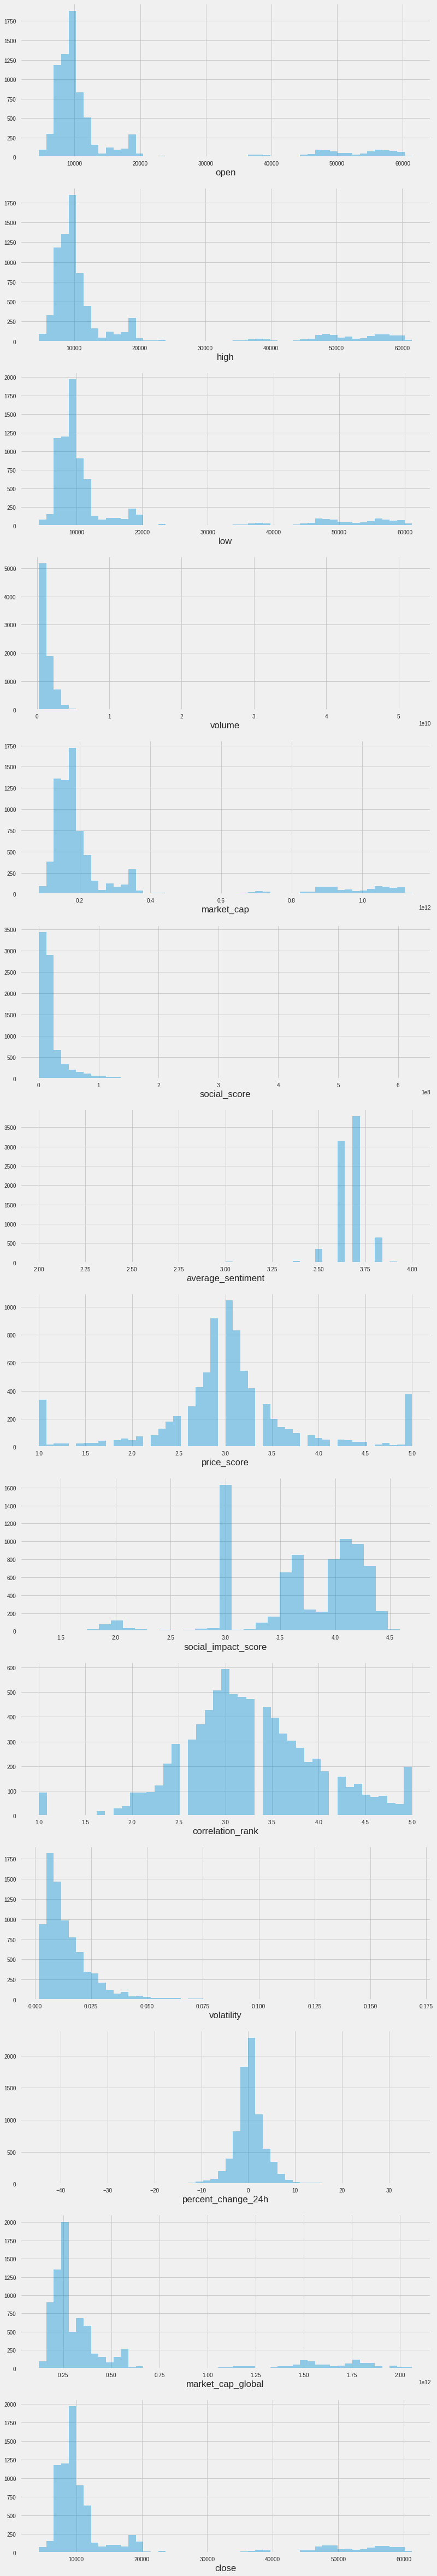

In [240]:
# plotting the histograms of numerical variables

fig, ax = plt.subplots(len(df.describe().columns), figsize=(12,80))
for x, col in enumerate(df.describe().columns):
  sns.distplot(df[col], ax=ax[x], kde=False)
  # ax[x].set_title('{}'.format(col), fontsize=10)
  # ax[x].set_xlabel(col, fontsize=8)

plt.show()



### Bivariate Data Analysis

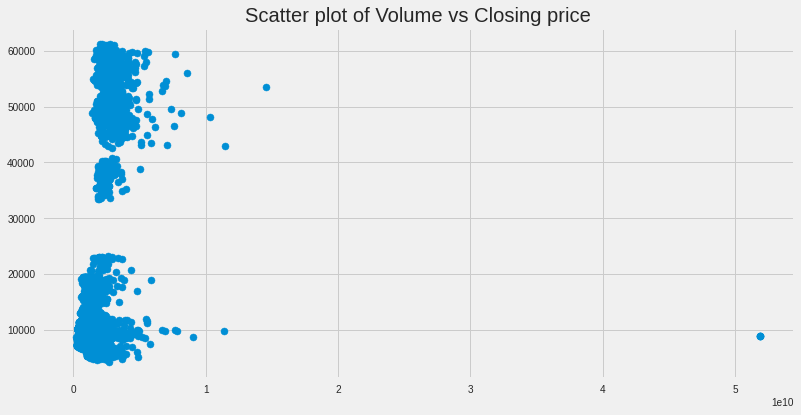

In [241]:
# scatter plot of volume vs close

plt.figure(figsize=(12, 6))
plt.scatter(df['volume'], df['close'])
plt.title("Scatter plot of Volume vs Closing price")
plt.show()

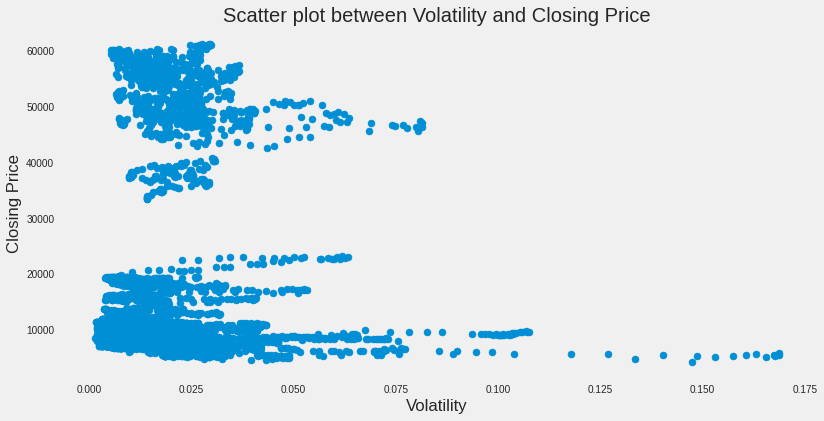

In [242]:
# scatter plot of volatility vs close

plt.figure(figsize=(12, 6))
plt.scatter(df['volatility'], df['close'])
plt.title("Scatter plot between Volatility and Closing Price")
plt.xlabel("Volatility")
plt.ylabel("Closing Price")
plt.grid()
plt.show()


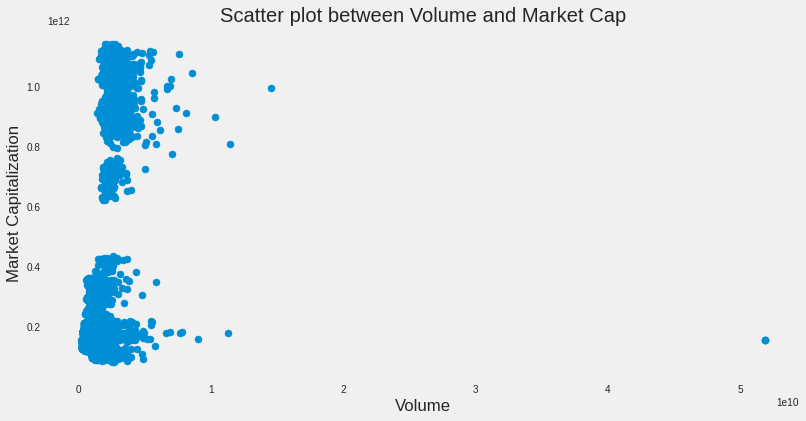

In [243]:
# scatter plot of volume vs market cap

plt.figure(figsize=(12, 6))
plt.scatter(df['volume'], df['market_cap'])
plt.title("Scatter plot between Volume and Market Cap")
plt.xlabel("Volume")
plt.ylabel("Market Capitalization")
plt.grid()
plt.show()

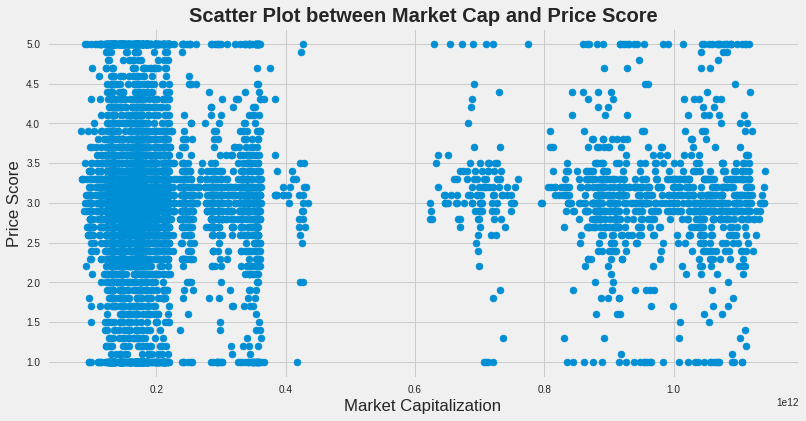

In [244]:
# scatter plot of market cap vs price score

plt.figure(figsize=(12, 6))
plt.scatter(df['market_cap'], df['price_score'])
plt.xlabel("Market Capitalization")
plt.ylabel("Price Score")
plt.title("Scatter Plot between Market Cap and Price Score", fontweight = 'bold')
plt.show()


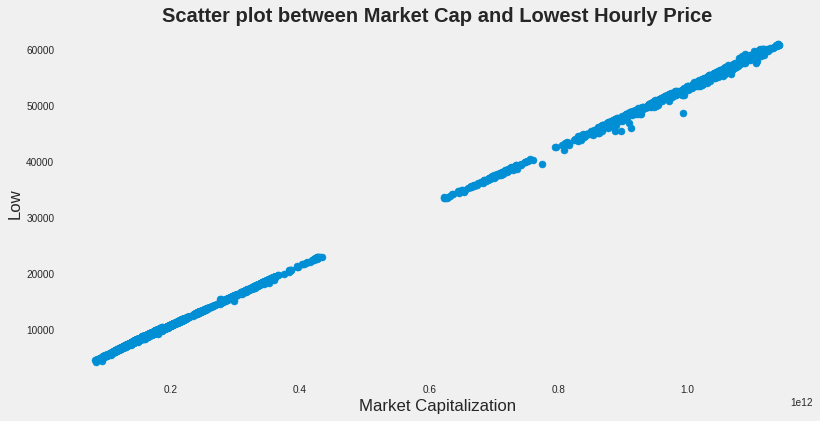

In [245]:
# scatter plot of market cap vs low

plt.figure(figsize=(12, 6))
plt.scatter(df['market_cap'], df['low'])
plt.title("Scatter plot between Market Cap and Lowest Hourly Price", fontweight='bold')
plt.xlabel("Market Capitalization")
plt.ylabel("Low")
plt.grid()
plt.show()

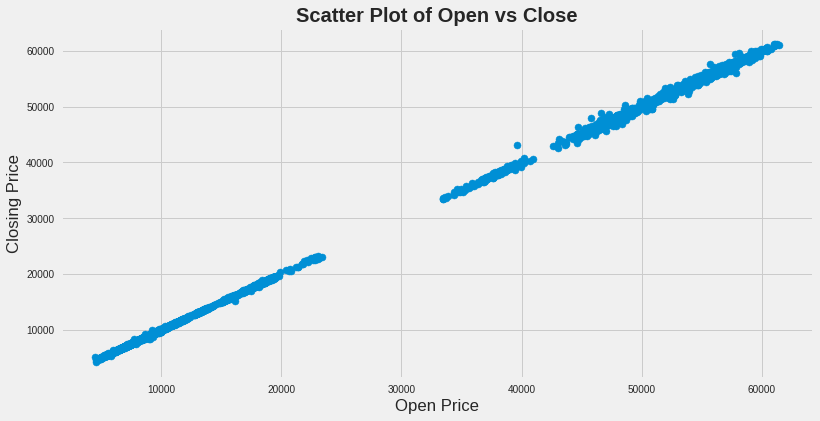

In [246]:
# scatter plot of open vs close

plt.figure(figsize=(12, 6))
plt.scatter(df['open'], df['close'])
plt.xlabel("Open Price")
plt.ylabel("Closing Price")
plt.title("Scatter Plot of Open vs Close", fontweight='bold')
plt.show()


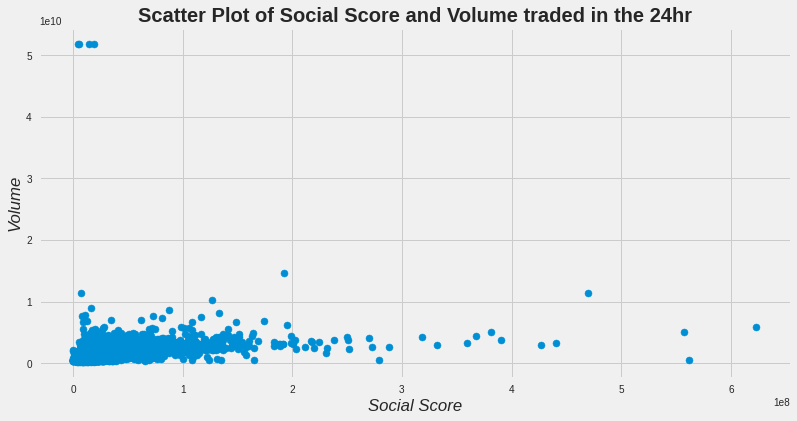

In [247]:
# scatter plot of social score vs volume

plt.figure(figsize=(12, 6))
plt.scatter(df['social_score'], df['volume'])
plt.title("Scatter Plot of Social Score and Volume traded in the 24hr", fontweight='bold')
plt.xlabel("Social Score", fontstyle='italic')
plt.ylabel("Volume", fontstyle='italic')
plt.show()


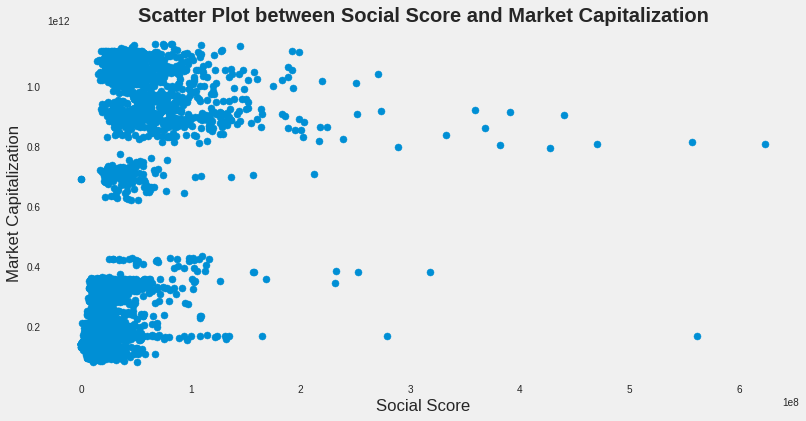

In [248]:
# scatter plot of social score vs market cap

plt.figure(figsize=(12, 6))
plt.scatter(df['social_score'], df['market_cap'])
plt.xlabel("Social Score")
plt.ylabel("Market Capitalization")
plt.title("Scatter Plot between Social Score and Market Capitalization", fontweight='bold')
plt.grid()
plt.show()

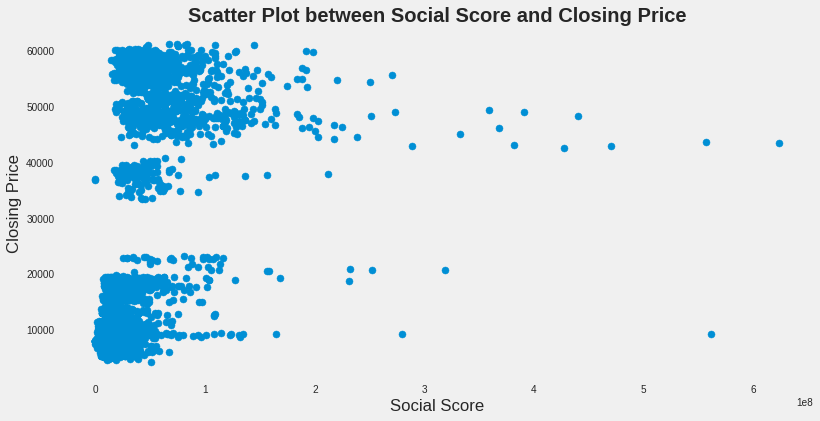

In [249]:
# scatter plot of social score vs close

plt.figure(figsize=(12, 6))
plt.scatter(df['social_score'], df['close'])
plt.title("Scatter Plot between Social Score and Closing Price", fontweight='bold')
plt.xlabel("Social Score")
plt.ylabel("Closing Price")
plt.grid()
plt.show()


<Figure size 7200x7200 with 0 Axes>

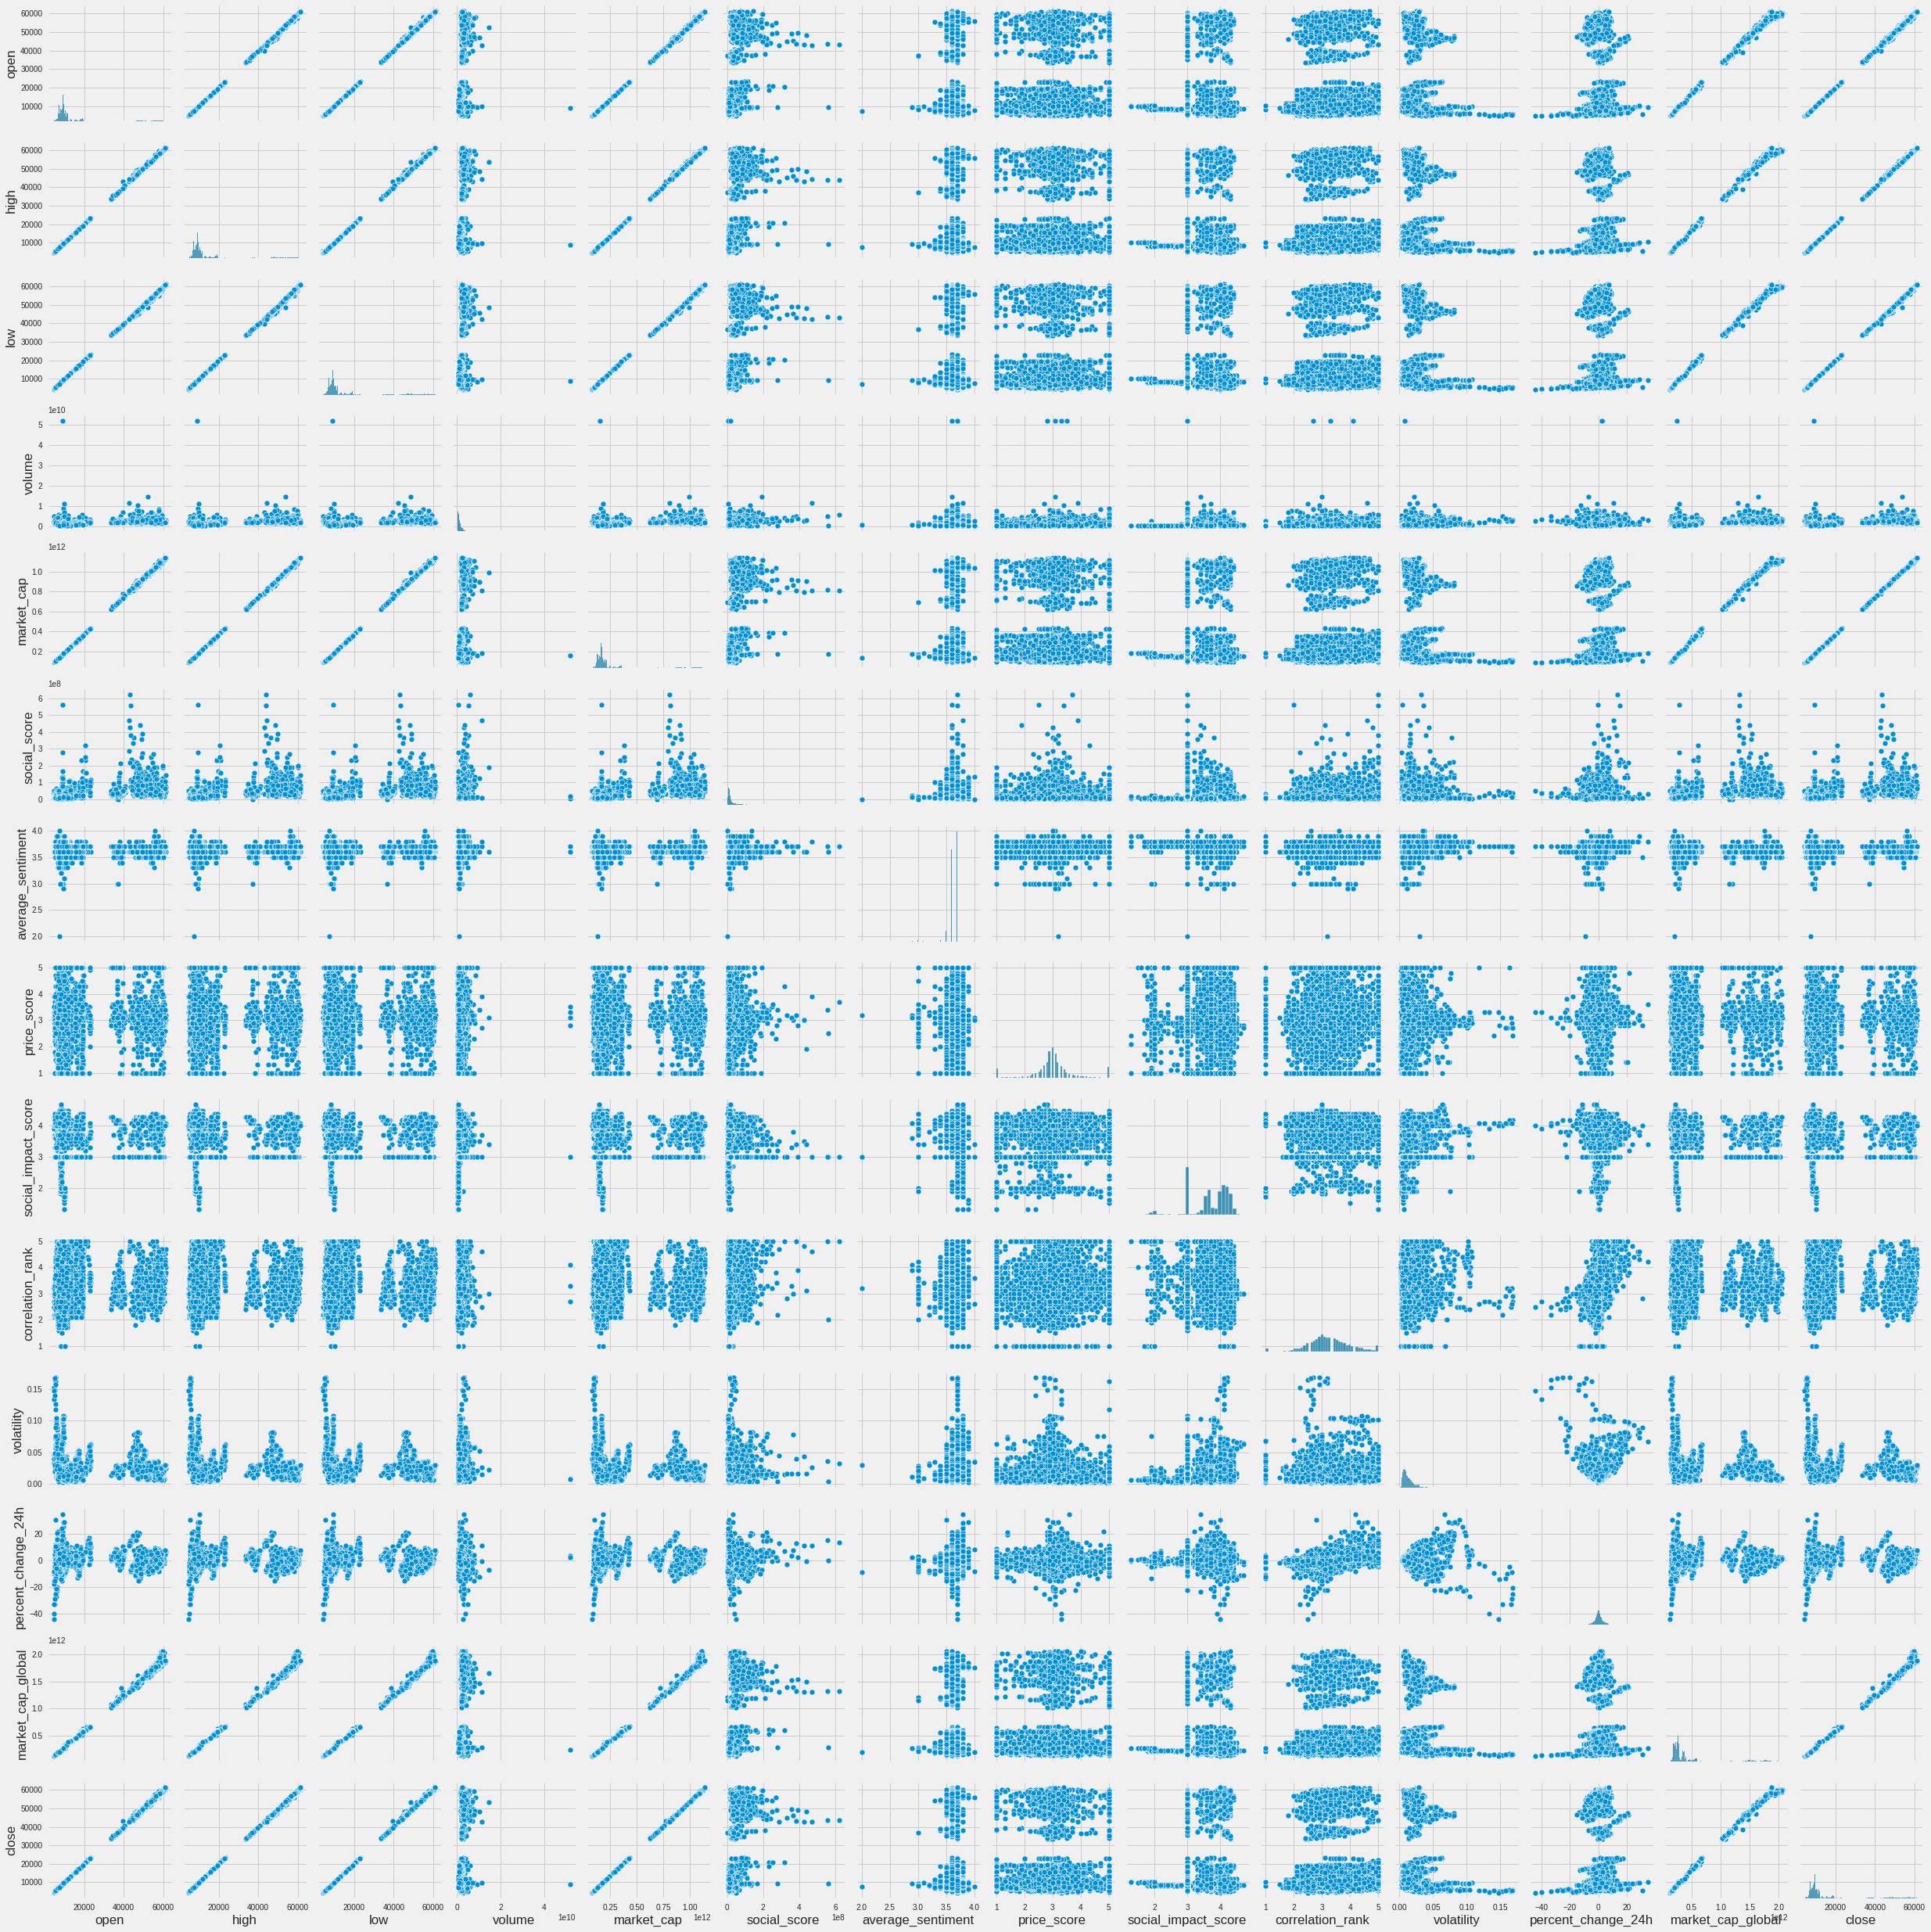

In [250]:
plt.figure(figsize=(100,100))
sns.pairplot(df)
plt.show()

In [251]:
# Correlation table of all the variables

correlations = df.corr()
correlations

open      high  ...  market_cap_global     close
open                 1.000000  0.999964  ...           0.998854  0.999937
high                 0.999964  1.000000  ...           0.998799  0.999971
low                  0.999960  0.999932  ...           0.998949  0.999956
volume               0.401064  0.402449  ...           0.399012  0.401298
market_cap           0.999934  0.999959  ...           0.998974  0.999978
social_score         0.592828  0.594220  ...           0.584767  0.593177
average_sentiment   -0.098284 -0.098237  ...          -0.105877 -0.098324
price_score          0.016381  0.016685  ...           0.017598  0.016518
social_impact_score -0.048065 -0.048117  ...          -0.043054 -0.048145
correlation_rank     0.045702  0.045791  ...           0.044291  0.045641
volatility           0.135597  0.137195  ...           0.127006  0.135882
percent_change_24h   0.089190  0.089405  ...           0.085281  0.090178
market_cap_global    0.998854  0.998799  ...           1.000000  0.998895
close                0.999937  0.999971  ...           0.998895  1.000000

[14 rows x 14 columns]

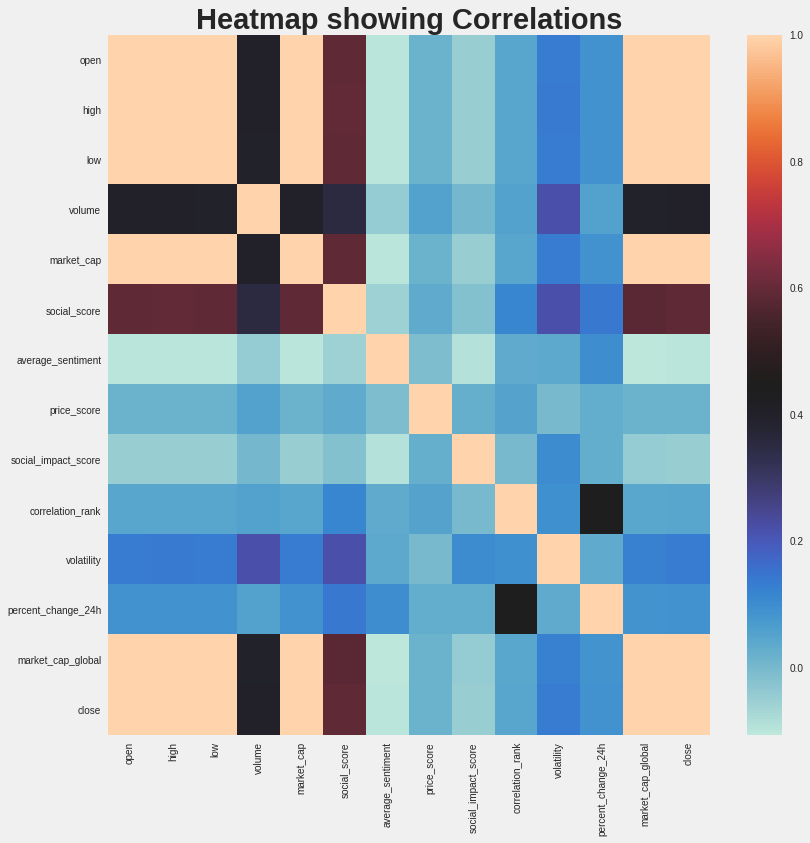

In [252]:
plt.figure(figsize=(12,12))
sns.heatmap(correlations, cmap='icefire')
plt.title("Heatmap showing Correlations", fontweight='bold', fontsize=29)
plt.show()

## Implementing the solution

### Detecting multicollinearity

In [253]:
# Checking for multicollinearity on the independent variables only

F = df.drop(['id','close'], 1)
correlations = F.corr()
correlations

open      high  ...  percent_change_24h  market_cap_global
open                 1.000000  0.999964  ...            0.089190           0.998854
high                 0.999964  1.000000  ...            0.089405           0.998799
low                  0.999960  0.999932  ...            0.090383           0.998949
volume               0.401064  0.402449  ...            0.057423           0.399012
market_cap           0.999934  0.999959  ...            0.089915           0.998974
social_score         0.592828  0.594220  ...            0.141118           0.584767
average_sentiment   -0.098284 -0.098237  ...            0.099483          -0.105877
price_score          0.016381  0.016685  ...            0.031983           0.017598
social_impact_score -0.048065 -0.048117  ...            0.030391          -0.043054
correlation_rank     0.045702  0.045791  ...            0.449280           0.044291
volatility           0.135597  0.137195  ...            0.034168           0.127006
percent_change_24h   0.089190  0.089405  ...            1.000000           0.085281
market_cap_global    0.998854  0.998799  ...            0.085281           1.000000

[13 rows x 13 columns]

The table above shows us how each variable relates to another. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. Let's use these correlations to compute the VIF score for each variable. This will require a little bit of linear algebra, but the approach is straightforward: we create a new dataframe with the *inverse* of the matrix above.

> VIF score to detect multicollinearity for the dataset

In [254]:
#dataframe with the inverse of the correlations matrix for train data
#use these correlations to compute the VIF score for each variable
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

open  ...  market_cap_global
open                 27430.050633  ...        -245.615828
high                -19630.154049  ...        1179.529363
low                 -16302.008292  ...        -218.563189
volume                  -4.113492  ...          -1.897863
market_cap            8747.686690  ...       -1327.986061
social_score            -0.592297  ...           5.068755
average_sentiment        8.684758  ...           2.350996
price_score              0.779510  ...          -0.588140
social_impact_score    -11.600271  ...          -1.637383
correlation_rank       -10.237079  ...          -1.369639
volatility               6.628494  ...           3.179220
percent_change_24h      20.520416  ...           3.278428
market_cap_global     -245.615828  ...         610.538422

[13 rows x 13 columns]

### Data Preprocessing

In [255]:
# Creating the X and y variables

X = df.drop(['id','close'], axis=1)
y = df['close']


> Standardization

In [256]:
# define standard scaler
scaler = StandardScaler()
# transform data
scaler.fit_transform(X)

array([[-0.41223459, -0.41308711, -0.41085898, ..., -0.5700746 ,
         0.29146172, -0.38972766],
       [-0.51326654, -0.51342793, -0.51376009, ..., -0.40266464,
        -0.74540984, -0.54034881],
       [ 2.38358952,  2.37871588,  2.3924029 , ..., -0.10354092,
         1.22552765,  2.3319172 ],
       ...,
       [ 0.27601363,  0.27086089,  0.28150604, ..., -0.59703445,
        -0.01950065,  0.23621859],
       [-0.39546032, -0.39676175, -0.3951415 , ..., -0.18495014,
         0.63013794, -0.40291596],
       [-0.24190093, -0.24418801, -0.24312422, ..., -0.12365459,
        -0.51001083, -0.16773836]])

> Splitting the data

In [257]:
#splitting our data into training and test sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# The above script splits 80% of the data to training set while 20% of the data to test set. 
# The test_size variable is where we actually specify the proportion of test set.

### Simple Linear Regression

In [258]:
# Training the Algorithm
#from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [259]:
# Getting the intercept and slope
# ---
# intercept

print(regressor.intercept_)

# slope
# 
print(regressor.coef_)

-49.53741749838082
[-4.03202877e-01  6.28438632e-01  3.98788439e-01  1.64076575e-10
  2.02703433e-08 -2.09477045e-07  5.11992335e+01 -9.91540067e-01
 -1.04721606e+01 -3.79239393e+00 -2.37219939e+02  1.03200698e+00
 -1.32428957e-10]


In [260]:
# Making Predictions
# ---
# 
y_pred = regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values, execute the following 
pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred

Actual     Predicted
8217    9553.167595   9527.870390
6069   55018.757681  54944.929844
11711   8059.125481   7987.952151
300     9724.531431   9755.102423
2953    6918.604923   6940.543468
...             ...           ...
4960   52466.608558  52379.795067
10693  40876.324585  40825.198423
14      8796.234581   8811.945650
4556   13153.964556  13102.616600
9014    9290.024257   9279.668245

[1608 rows x 2 columns]

> We will note from the output that though our model is not very precise, 
 the predicted percentages are somehow close to the actual ones.

> From the output, we will see that the value of root mean squared error is 56.53

#### Residual plots and heteroskedasticity testing

In [262]:
# This is our prediction for price based on our model
y_pred = regressor.predict(X_test)
print(y_pred)
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset
residuals = np.subtract(y_pred, y_test)
print('residuals:\n',residuals)
# Let's describe our residual:
pd.DataFrame(residuals).describe()

print('residuals mean:\n',residuals.mean())

[ 9527.87039042 54944.92984409  7987.95215117 ...  8811.9456502
 13102.61659974  9279.6682452 ]
residuals:
 8217    -25.297205
6069    -73.827837
11711   -71.173330
300      30.570992
2953     21.938545
           ...    
4960    -86.813491
10693   -51.126162
14       15.711069
4556    -51.347956
9014    -10.356012
Name: close, Length: 1608, dtype: float64
residuals mean:
 1.0255066895211165


> Let's show the residual plot

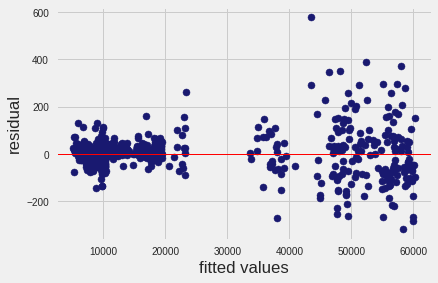

In [263]:
plt.scatter(y_pred, residuals, color='midnightblue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

This does not look too bad: our residuals are centered around a mean that is very close to 0, and there are no glaringly obvious patterns. Let's be thorough though, and perform a heteroskedasticity test.

For this we will use [bartlett's test](https://www.itl.nist.gov/div898/handbook/eda/section3/eda357.htm). The test establishes as a null hypothesis that the variance is equal for all our datapoints,and the new hypothesis that the variance is different for at least one pair of datapoints.


In [264]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# We compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

# If the test_result is greater than the critical value, then
# this would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed.')
else:
  print('The variances are homogeneous.')

The variances are homogeneous.


In [265]:
# The R2 score and RMSE for the linear model is 



from sklearn.metrics import r2_score

linear_R2 = a = r2_score(y_test, y_pred)
print("The R2 score for the linear model is:", linear_R2)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

The R2 score for the linear model is: 0.9999837140227172
Mean Absolute Error: 32.69568828567964
Mean Squared Error: 3195.594138605609
Root Mean Squared Error: 56.52958640044706


### Lasso Regression

In [266]:
# instantiating the model

lasso = Lasso(normalize=False)

# fitting the model
lasso.fit(X_train, y_train)

# making predictions
lasso_pred = lasso.predict(X_test)

# assessing the model

print("Lasso Model Metrics")
print("Lasso regression r2 score: ", r2_score(y_test, lasso_pred))
print("Lasso mean absolute error: ", mean_absolute_error(y_test, lasso_pred))
print("Lasso Root mean squared error: ", np.sqrt(mean_squared_error(y_test, lasso_pred)))

Lasso Model Metrics
Lasso regression r2 score:  0.999928948482113
Lasso mean absolute error:  51.86144866566898
Lasso Root mean squared error:  118.07435334303317


In [267]:
# Hyperparamter tuning of alpha parameter

clf = GridSearchCV(estimator=Lasso(),
                   param_grid = {'alpha' : np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))},
                   scoring = 'neg_root_mean_squared_error',
                   cv = 10,
                   refit = True)

clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.5,  3. ,
        3.5,  4. ,  4.5,  5. ,  6. ,  7. ,  8. ,  9. , 10. , 11. , 12. ,
       13. , 14. , 15. , 16. , 17. , 18. , 19. , 20. , 21. , 22. , 23. ,
       24. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_root_mean_squared_error', verbose=0)

In [268]:
# best performing model
clf.best_estimator_

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Default Regressor was the best fit. Examining the coefficients produced

In [269]:
lasso_coefficients = {column : coef for column, coef in zip(X_train.columns, lasso.coef_ * 100)}

pd.DataFrame.from_dict(data=lasso_coefficients, orient = 'index',
                       columns = ['Coefficients * 100']).sort_values(by='Coefficients * 100', ascending=False)


Coefficients * 100
percent_change_24h         4.679356e+02
open                       8.868952e+01
price_score                7.600714e+01
high                       6.982710e+00
social_score               1.401123e-05
market_cap                 2.549747e-07
volume                     7.294341e-08
market_cap_global          9.466798e-09
average_sentiment         -0.000000e+00
volatility                 0.000000e+00
low                       -7.936106e-01
social_impact_score       -3.963735e+02
correlation_rank          -1.016857e+03

### Ridge Regression

In [270]:
# Instantiating the model
ridge = Ridge(normalize=True)

# Tuning the L2 parameter
clf = GridSearchCV(estimator = ridge,
                   param_grid = {'alpha':np.logspace(-5,2,8)},
                   scoring = 'neg_root_mean_squared_error',
                   cv = 10,
                   )

clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=True, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_root_mean_squared_error', verbose=0)

In [271]:
# best estimator
clf.best_estimator_

Ridge(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [272]:
# fitting best estimator and assessing it's performance
ridge = Ridge(alpha = 1e-05, normalize=True, max_iter = 10000, random_state=0)

ridge.fit(X_train, y_train)

# predictions and assessment
ridge_pred = ridge.predict(X_test)

print("Ridge Metrics")
print("R2 score: ", r2_score(y_test, ridge_pred))
print("Mean absolute error: ", mean_absolute_error(y_test, ridge_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, ridge_pred)))

Ridge Metrics
R2 score:  0.9999826664512972
Mean absolute error:  35.090384162248114
Root Mean Squared Error:  58.31934506566897


In [273]:
# Ridge coefficients
ridge_coef = {column : coef for column, coef in zip(X_train.columns, ridge.coef_)}

pd.DataFrame.from_dict(data = ridge_coef,
                       orient = 'index',
                       columns = ['Coefficients']).sort_values(by = 'Coefficients', ascending=False)

Coefficients
average_sentiment    5.945197e+01
percent_change_24h   1.437565e+00
high                 4.951252e-01
low                  3.157680e-01
market_cap           2.298288e-08
volume               2.122666e-10
market_cap_global   -1.362146e-10
social_score        -1.832550e-07
open                -2.372797e-01
price_score         -7.716423e-01
correlation_rank    -4.911834e+00
social_impact_score -1.259599e+01
volatility          -1.395863e+02

### Elastic Net

In [274]:
elastic = ElasticNet()

clf = GridSearchCV(estimator = elastic,
                   param_grid = {'alpha' : np.logspace(-5,2,8),
                                 'l1_ratio' : [.2,.4,.6,.8]},
                   cv = 10,
                   refit = True,
                   scoring = 'neg_root_mean_squared_error')

clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'l1_ratio': [0.2, 0.4, 0.6, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_root_mean_squared_error', verbose=0)

In [275]:
# best estimator
clf.best_estimator_

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.2,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [278]:
# fitting new parameters and assessing
elastic = ElasticNet(alpha=0.01, l1_ratio = 0.2)
elastic.fit(X_train, y_train)

# predictions
elastic_pred = elastic.predict(X_test)
# assessing
print("Elastic Net Metrics")
print("Mean absolute error: ", mean_absolute_error(y_test, elastic_pred))
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_test, elastic_pred)))
print("R2 score: ", r2_score(y_test, elastic_pred))

Elastic Net Metrics
Mean absolute error:  52.25898042192612
Root mean squared error:  118.18466751153109
R2 score:  0.999928815656477


In [309]:
# coefficient importance
e_coef = {column : coef for column, coef in zip(X_train.columns, elastic.coef_)}

pd.DataFrame.from_dict(e_coef, 
                       orient='index', columns= ['Coefs']).sort_values(by='Coefs', ascending=False)

Coefs
volatility           5.510657e+00
percent_change_24h   4.977603e+00
price_score          2.427243e+00
open                 8.868578e-01
high                 6.977071e-02
social_score         1.423503e-07
market_cap           2.552284e-09
volume               7.477691e-10
market_cap_global    9.691296e-11
low                 -7.980464e-03
social_impact_score -7.058648e+00
average_sentiment   -8.680554e+00
correlation_rank    -1.262098e+01

### Random Forest Regressor

> Since Random Forest is a bootstrapping technique that picks from different set of features for different models, every model sees a different set of data points and this means that the Random Forest algorithm is not affected by multicollinearity.



In [279]:
# Feature and label seperation
X = df.drop(['id','close'], axis=1)
y = df['close']


# Splitting the data into test and train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [280]:
# Instantiate model with 1000 decision trees
rf_mod  =  RandomForestRegressor(n_estimators = 1000, random_state=42)

# Train the model

rf_mod  =  rf_mod.fit(X_train, y_train)

In [281]:
# Making predictions based on the trained model 

rf_pred = rf_mod.predict(X_test)

In [282]:
# Model Evaluation

print('Mean Absolute Error (RF):', mean_absolute_error(y_test, rf_pred))  
print('Mean Squared Error (RF):', mean_squared_error(y_test, rf_pred))  
print('Root Mean Squared Error (RF):', np.sqrt(mean_squared_error(y_test, rf_pred)))

Mean Absolute Error (RF): 27.061234772871597
Mean Squared Error (RF): 4426.201970245538
Root Mean Squared Error (RF): 66.52970742642371




> The random forest model achieved an RMSE of 66.53 which is poorer compared to our baseline model.



#### Feature importance

In [283]:
# Get numerical feature importances
importances = list(rf_mod.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(X, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: market_cap_global    Importance: 0.385
Variable: market_cap           Importance: 0.205
Variable: high                 Importance: 0.168
Variable: low                  Importance: 0.152
Variable: open                 Importance: 0.091
Variable: volume               Importance: 0.0
Variable: social_score         Importance: 0.0
Variable: average_sentiment    Importance: 0.0
Variable: price_score          Importance: 0.0
Variable: social_impact_score  Importance: 0.0
Variable: correlation_rank     Importance: 0.0
Variable: volatility           Importance: 0.0
Variable: percent_change_24h   Importance: 0.0


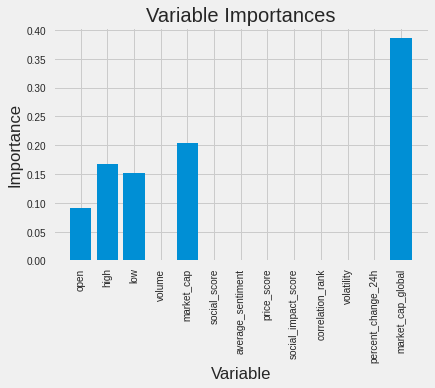

In [284]:
# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, X, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances');

> At the top of the list of important features is market cap global followed by market cap which indicate the total dollar market value of an asset. This tells us that the best predictors of the closing price of a crypto is the market capitalizations of the coin, which is a rather intuitive finding. 

> Other relatively important factors are the various prices the cryptocurrency ranged at within the one hour timeframe, the open price of the coin, the highest price and the lowest price. 





### XGBOOST

In [285]:
# Import the regressor needed

from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score


# Instantiate the model
xgb = XGBRegressor(max_depth = 5, eta = 0.5, booster = 'gbtree')

In [286]:
# Training the model
xgb.fit(X_train,y_train)

# Making predictions on the model trained
xgb_pred = xgb.predict(X_test)

[12:24:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [287]:
# Model Evaluation

print('Mean Absolute Error (XGB):', mean_absolute_error(y_test, xgb_pred))  
print('Mean Squared Error (XGB):', mean_squared_error(y_test, xgb_pred))  
print('Root Mean Squared Error (XGB):', np.sqrt(mean_squared_error(y_test, xgb_pred)))

Mean Absolute Error (XGB): 37.49228921435783
Mean Squared Error (XGB): 5979.5571831989955
Root Mean Squared Error (XGB): 77.3275965176663


### Light GBM


In [288]:
# creating Lightgbm datasets
lgbm_train = lightgbm.Dataset(X_train, label = y_train)
lgbm_test = lightgbm.Dataset(X_test, label = y_test)

In [305]:
# Specifying parameters

parameters = {'objective' : 'regression',
              'metric' : 'root_mean_squared_error',
              'boosting' : 'gbdt',
              'num_leaves' : 50,
              'feature_fraction' : 0.5,
              'bagging_fraction' : 0.5,
              'bagging_freq' : 100,
              'learning_rate' : 0.005,
              'verbose' : -1}
      


In [306]:
# Training the model
model_lgbm  = lightgbm.train(params=parameters,
                             train_set = lgbm_train,
                             num_boost_round = 10000,
                             valid_sets = lgbm_test,
                             early_stopping_rounds = 100)


[1]	valid_0's rmse: 13938.8
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 13869.3
[3]	valid_0's rmse: 13800
[4]	valid_0's rmse: 13731.2
[5]	valid_0's rmse: 13662.8
[6]	valid_0's rmse: 13594.6
[7]	valid_0's rmse: 13527
[8]	valid_0's rmse: 13459.5
[9]	valid_0's rmse: 13392.4
[10]	valid_0's rmse: 13325.8
[11]	valid_0's rmse: 13259.3
[12]	valid_0's rmse: 13193.2
[13]	valid_0's rmse: 13127.3
[14]	valid_0's rmse: 13061.7
[15]	valid_0's rmse: 13009.5
[16]	valid_0's rmse: 12944.5
[17]	valid_0's rmse: 12880
[18]	valid_0's rmse: 12815.8
[19]	valid_0's rmse: 12751.9
[20]	valid_0's rmse: 12688.5
[21]	valid_0's rmse: 12625.4
[22]	valid_0's rmse: 12562.6
[23]	valid_0's rmse: 12499.8
[24]	valid_0's rmse: 12437.5
[25]	valid_0's rmse: 12375.4
[26]	valid_0's rmse: 12313.6
[27]	valid_0's rmse: 12252.2
[28]	valid_0's rmse: 12191.1
[29]	valid_0's rmse: 12130.1
[30]	valid_0's rmse: 12069.8
[31]	valid_0's rmse: 12009.8
[32]	valid_0's rmse: 11949.8
[33]	valid_0's rmse: 118

In [307]:
# predictions and assessment
lgbm_pred = model_lgbm.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, lgbm_pred)))

248.76023869620406


## Challenging the solution

## Follow up questions